In [1]:
# Iris data set contains 50 samples of each of 3 Iris species (Iris setosa, Iris virginica, Iris versicolor) 
# 4 features were measured from each sample - lenght & width of sepals & petals (cm)
# Lets classify the samples using Logistic Regression

#Data imports
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

#Viz imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# get data
from sklearn.datasets import load_iris

#ML imports
from sklearn import linear_model

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
iris = load_iris()

In [4]:
X = iris.data

Y = iris.target

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
iris_data = DataFrame(X, columns=['Sepal Lengh', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_data.head()

,Sepal Lengh,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
iris_target = DataFrame(Y, columns = ['Species'])
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [15]:
# function which returns actual species value
def flower(num):
    if num==0:
        return 'Setosa'
    elif num==1:
        return 'Versicolor'
    else:
        return 'Virginica'

In [17]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [18]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [20]:
# concat the 2 data frames
iris = pd.concat([iris_data, iris_target], axis=1)
iris

,Sepal Lengh,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [21]:
# Lets analyze data

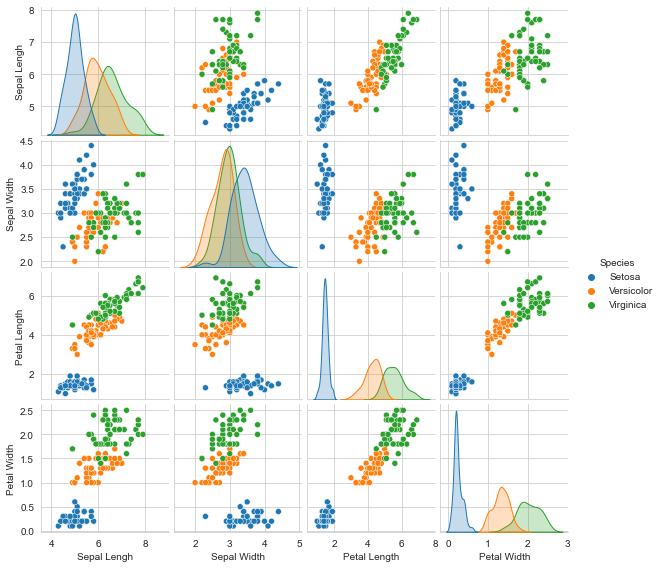

In [23]:
sns.pairplot(iris, hue='Species', height=2)

In [24]:
# from above plot we can say that Setosa is clearly separated from other 2 species
# The challenge will be to separate Versicolor & Virginica

<AxesSubplot:xlabel='Petal Length', ylabel='count'>

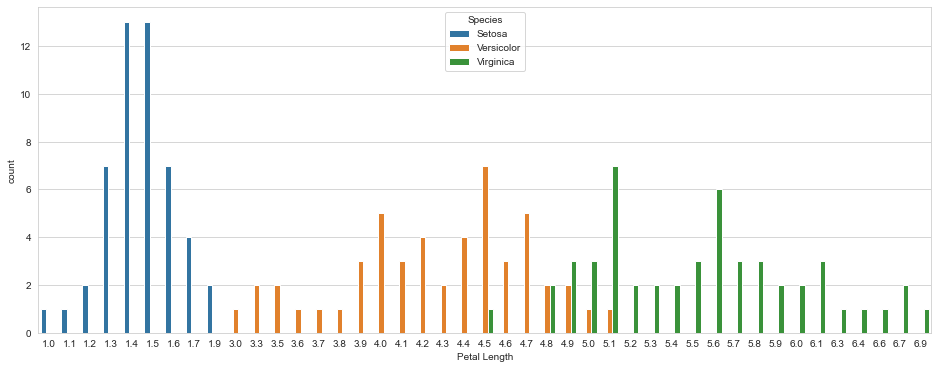

In [32]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Petal Length', data=iris, hue='Species')

In [33]:
# Multi-class classification with Sci Kit Learn

In [34]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
logreg = LogisticRegression(max_iter = 1000)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 3)

In [38]:
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [41]:
# to test accuracy
from sklearn import metrics

In [42]:
Y_pred = logreg.predict(X_test)

In [43]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9666666666666667


In [46]:
# Lets try to use K-nearest Neighbor model to predict the same
from sklearn.neighbors import KNeighborsClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [47]:
knn = KNeighborsClassifier(n_neighbors=6)

In [48]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [49]:
Y_pred = knn.predict(X_test)

In [50]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.95


In [51]:
#lets change parameter to 1 from 6
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

0.9666666666666667


In [52]:
# Since our data is amll, we wil lcycle through many K-values to find the optimum one

In [54]:
k_range = range(1,21)

accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Text(0, 0.5, 'Testing Accuracy')

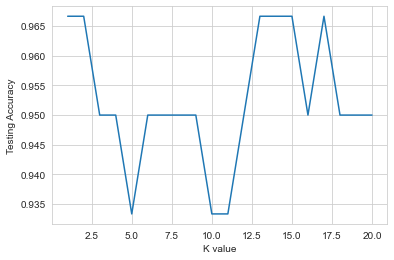

In [55]:
plt.plot(k_range, accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')

In [ ]:
#seems like k=1, 13, 14, 16 are most optimum for this data's classification to predict the species